### Working with VAD Lexicons

As part of Chronoberg's metadata, we have introduce lexicons spanning across three dimensions of emotions namely Valence, Dominance, and Arousal. In this notebook, we will walk through the lexicons and show how to interact with the lexicons, performing diachronic semantic anlaysis, determining the count of the words undergone transitions of affective polarity, and the ways to create your own lexicons.

The lexicons are available at [ChronoBerg_lexicons](https://huggingface.co/datasets/sdp56/ChronoBerg/tree/main)

The lexicons are grouped by their individual dimension (Valence, Arousal, and Dominance) and the time-intervals ranging (1750-2000s).
Please download the lexicons before running this notebook 

Sample code to download: "!wget -O /app/src/ChronoBerg/cade/new_lexicons/valence_dic_1750_new.pt https://huggingface.co/datasets/sdp56/ChronoBerg/blob/main/Chronoberg_annotated_1750.pth"

In [ ]:
### Import necessary libraries
import torch
import json
import pandas as pd
from collections import defaultdict
import math
import numpy as np
import pandas as pd


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### LOAD the lexicons

We have introduced individual lexicon per 50 year time-interval, So, let us first load each of these lexicons. 

In [ ]:
## Download the lexicons
#!wget -O /app/src/ChronoBerg/cade/new_lexicons/valence_dic_1750_new.pt https://zenodo.org/record/1484816/files/valence_dic_1750_new.pt?download=1

print("Loading lexicons...")

path_lexicons = '/app/src/ChronoBerg/cade/new_lexicons/'

valence_1750 = torch.load(path_lexicons + 'valence_dic_1750_new.pt', weights_only=False)
valence_1800 = torch.load(path_lexicons + 'valence_dic_1800_new.pt', weights_only=False)
valence_1850 = torch.load(path_lexicons + 'valence_dic_1850_new.pt', weights_only=False)
valence_1900 = torch.load(path_lexicons + 'valence_dic_1900_new.pt', weights_only=False)
valence_1950 = torch.load(path_lexicons + 'valence_dic_1950_new.pt', weights_only=False)
print(f"Loaded {len(valence_1750)} words from 1750 lexicon")
print(f"Loaded {len(valence_1800)} words from 1800 lexicon")
print(f"Loaded {len(valence_1850)} words from 1850 lexicon")
print(f"Loaded {len(valence_1900)} words from 1900 lexicon")
print(f"Loaded {len(valence_1950)} words from 1950 lexicon")

print("All lexicons loaded.")


### Create a unified dictionary of words across all lexicons
lexicons_all = {'1750': valence_1750, '1800': valence_1800, '1850': valence_1850, '1900': valence_1900, '1950': valence_1950}

Loading lexicons...


Loaded 87360 words from 1750 lexicon
Loaded 133886 words from 1800 lexicon
Loaded 181955 words from 1850 lexicon
Loaded 199535 words from 1900 lexicon
Loaded 85000 words from 1950 lexicon
All lexicons loaded.


Extracting valence scores for a word in lexicons

In [ ]:
## One could simply pass a word as a key to get its valence score in a particular lexicon
# valence_1950['asylum']

word = 'enjoy'  
year = 1750
print(f"The valence score for the word {word} during the time-interval {year} was: {lexicons_all[str(year)].get(word, 'N/A')}")

print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
### Analyzing sentiment shift for the word across lexicons
word = 'enjoy'
print(f"Analyzing sentiment shift for the word: {word}")
for year in [1750, 1800, 1850, 1900, 1950]:     
    print(f"The valence score for the word {word} during the time-interval {year} was: {lexicons_all[str(year)].get(word, 'N/A')}")
    print("-----")



The valence score for the word enjoy during the time-interval 1750 was: 0.52
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Analyzing sentiment shift for the word: enjoy
The valence score for the word enjoy during the time-interval 1750 was: 0.52
-----
The valence score for the word enjoy during the time-interval 1800 was: 0.6
-----
The valence score for the word enjoy during the time-interval 1850 was: 0.62
-----
The valence score for the word enjoy during the time-interval 1900 was: 0.63
-----
The valence score for the word enjoy during the time-interval 1950 was: 0.73
-----


#### Visualizing sentiment shift for multiple words from positive to negative and vice-versa (Table 1. of the paper)


In [34]:
import pandas as pd
## Visualizing sentiment shift for multiple words across lexicons

words_pos_neg = ["asylum", "germs", "homeless", "punk", "weird"]
words_neg_pos = ["febrile", "infatuation", "destiny", "bravo", "bewitchments"]

# Data for Positive → Negative
data_pos_neg = {
    "Words": words_pos_neg,
    "1750s": [lexicons_all["1750"].get(word, 0) for word in words_pos_neg],
    "1800s": [lexicons_all["1800"].get(word, 0) for word in words_pos_neg],
    "1850s": [lexicons_all["1850"].get(word, 0) for word in words_pos_neg],
    "1900s": [lexicons_all["1900"].get(word, 0) for word in words_pos_neg],
    "1950s": [lexicons_all["1950"].get(word, 0) for word in words_pos_neg],
}

df_pos_neg = pd.DataFrame(data_pos_neg)

# Data for Negative → Positive
data_neg_pos = {
    "Words": words_neg_pos,
    "1750s": [lexicons_all["1750"].get(word, 0) for word in words_neg_pos],
    "1800s": [lexicons_all["1800"].get(word, 0) for word in words_neg_pos],
    "1850s": [lexicons_all["1850"].get(word, 0) for word in words_neg_pos],
    "1900s": [lexicons_all["1900"].get(word, 0) for word in words_neg_pos],
    "1950s": [lexicons_all["1950"].get(word, 0) for word in words_neg_pos],
}

df_neg_pos = pd.DataFrame(data_neg_pos)

# Display side by side in Jupyter (using pandas.concat with keys)
df_combined = pd.concat(
    {"Positive → Negative": df_pos_neg, "Negative → Positive": df_neg_pos},
    axis=1
)

styled =( df_combined.style.set_properties(
        subset=[("Positive → Negative", "Words"), ("Negative → Positive", "Words")],
        **{"text-align": "left"}
    )
    .format("{:.2f}", na_rep="", subset=pd.IndexSlice[:, df_combined.columns.get_level_values(1) != "Words"])
    .set_table_styles([
        {"selector": "th.col_heading.level0", "props": [("text-align", "center")]},  # top headers
        {"selector": "th.col_heading.level1", "props": [("text-align", "center")]},  # sub headers
    ])
)

styled




### Determining the range of the words in CHRONOBERG undergone semantic shifts

- Determine the set of the unique words across the lexicons

In [43]:
words_list = list(valence_1750.keys()) + list(valence_1800.keys()) + list(valence_1850.keys()) + list(valence_1900.keys()) + list(valence_1950.keys())
words_list = list(set(words_list))

print("Number of unique words in CHRONOBERG:", len(words_list)) 

Number of unique words in CHRONOBERG: 335804


In [48]:
## Establish a comprehensive dictionary with valence scores across all lexicons
valence_com = defaultdict(list)
for w_ in words_list:
    valence_com[w_].append(valence_1750.get(w_, 'None'))
    valence_com[w_].append(valence_1800.get(w_, 'None'))
    valence_com[w_].append(valence_1850.get(w_, 'None'))
    valence_com[w_].append(valence_1900.get(w_, 'None'))
    valence_com[w_].append(valence_1950.get(w_, 'None'))
#valence_com

In [49]:
key_change = []
for key, value in valence_com.items():
    c = 0
    for val in value:
        if val != 'None':
            c += 1
    key_change.append(key) if c>2 else None

print("The total number of words with changes in the valence across decades:", len(key_change))

neg_pos= []
pos_neg= []
for key, value in valence_com.items():
    if key in key_change:
        filered = [v for v in value if v != 'None']
        if filered[0] < filered[len(filered)-1]:
            neg_pos.append((key, filered[0] - filered[len(filered)-1]))
        else:
            pos_neg.append((key, filered[0] - filered[len(filered)-1]))
print("Number of words with negative --> positive valence change:", len(neg_pos))
print("Number of words with positive --> negative valence change:", len(pos_neg))

The total number of words with changes in the valence across decades: 92359
Number of words with negative --> positive valence change: 47110
Number of words with positive --> negative valence change: 45249


In [58]:

neg_pos_dict = {}
for (w,val) in neg_pos:
    neg_pos_dict[w] = np.abs(val)
neg_pos_dict

neg_pos_csv = pd.DataFrame.from_dict(neg_pos_dict, orient='index', columns=['valence'])
neg_pos_csv = neg_pos_csv.reset_index() 
neg_pos_csv = neg_pos_csv.rename(columns={'index': 'words'})
neg_pos_csv = neg_pos_csv.sort_values(by='valence', ascending=False)
print("Top 10 words with negative --> positive valence change:")
print(neg_pos_csv.head())
print("--------------------------------------------------------")
pos_neg_dict = {}
for (w,val) in pos_neg:
    pos_neg_dict[w] = np.abs(val)
pos_neg_dict

pos_neg_csv = pd.DataFrame.from_dict(pos_neg_dict, orient='index', columns=['valence'])
pos_neg_csv = pos_neg_csv.reset_index() 
pos_neg_csv = pos_neg_csv.rename(columns={'index': 'words'})
pos_neg_csv = pos_neg_csv.sort_values(by='valence', ascending=False)
print("Top 10 words with positive --> negative valence change:")
print(pos_neg_csv.head())

Top 10 words with negative --> positive valence change:
           words  valence
26723      bevys     1.92
45207    stiegel     1.90
20619   successa     1.83
9881   vanderlin     1.79
10478  merriness     1.74
--------------------------------------------------------
Top 10 words with positive --> negative valence change:
             words  valence
43004     ignrance     1.87
34009  overexcited     1.80
16405  arrogancies     1.75
37238  forelooking     1.75
31538  unsoldierly     1.73


#### Analyse the variance in the valence of words based on different thresholds


In [ ]:
word_75 = list(neg_pos_csv['words'][ neg_pos_csv['valence']>= (1.92 - 0.25*1.92)])
word_50 = list(neg_pos_csv['words'][ neg_pos_csv['valence']>= (1.92 - 0.50*1.92)])
word_25 = list(neg_pos_csv['words'][ neg_pos_csv['valence']>= (1.92 - 0.75*1.92)])
word_all = list(neg_pos_csv['words'][ neg_pos_csv['valence']>=0.01])
print("Number of words in different thresholds (Negative --> Positive):")
print("Thresholds: 75% , 50% , 25% , Minimal change")
print("--------------------------------------------------------")
print("Number of words in different thresholds:")
print("Number of words in 75% threshold:", len(word_75))
print("Number of words in 50% threshold:", len(word_50))
print("Number of words in 25% threshold:", len(word_25))
print("Number of words in minimal change threshold:", len(word_all))

neg_pos_words = {}
neg_pos_words['word_75'] = word_75
neg_pos_words['word_50'] = word_50
neg_pos_words['word_25'] = word_25
neg_pos_words['word_all'] = word_all



Number of words in different thresholds (Negative --> Positive):
Thresholds: 75% , 50% , 25% , Minimal change
--------------------------------------------------------
Number of words in different thresholds:
Number of words in 75% threshold: 67
Number of words in 50% threshold: 1179
Number of words in 25% threshold: 8787
Number of words in minimal change threshold: 46634


In [ ]:
word_75 = list(pos_neg_csv['words'][ pos_neg_csv['valence']>= (1.87 - 0.25*1.87)])
word_50 = list(pos_neg_csv['words'][ pos_neg_csv['valence']>= (1.87 - 0.50*1.87)])
word_25 = list(pos_neg_csv['words'][ pos_neg_csv['valence']>= (1.87 - 0.75*1.87)])
word_all = list(pos_neg_csv['words'][ pos_neg_csv['valence']>=0.01])
print("Number of words in different thresholds (Positive --> Negative):")
print("Thresholds: 75% , 50% , 25% , Minimal change")
print("--------------------------------------------------------")
print("Number of words in different thresholds:")
print("Number of words in 75% threshold:", len(word_75))
print("Number of words in 50% threshold:", len(word_50))
print("Number of words in 25% threshold:", len(word_25))
print("Number of words in minimal change threshold:", len(word_all))
pos_neg_words = {}
pos_neg_words['word_75'] = word_75
pos_neg_words['word_50'] = word_50
pos_neg_words['word_25'] = word_25
pos_neg_words['word_all'] = word_all



Number of words in different thresholds (Positive --> Negative):
Thresholds: 75% , 50% , 25% , Minimal change
--------------------------------------------------------
Number of words in different thresholds:
Number of words in 75% threshold: 55
Number of words in 50% threshold: 939
Number of words in 25% threshold: 7885
Number of words in minimal change threshold: 43139


### Plot the curves showing the number of the words contributing to the variance among sentences

[67, 1179, 8787, 46634]


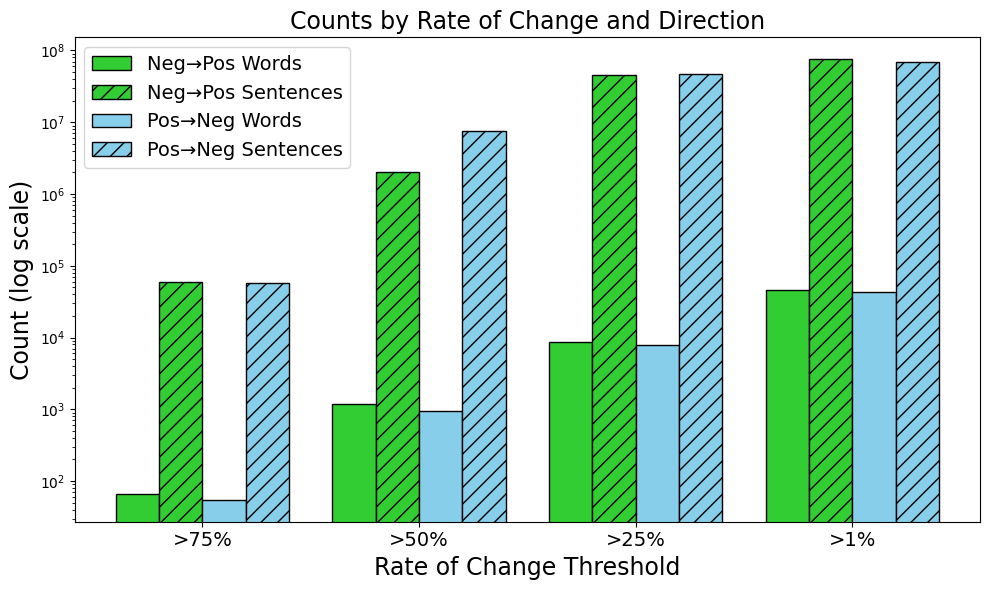

In [64]:

# Data from your table
thresholds = [">75%", ">50%", ">25%", ">1%"]

neg_pos_words_count = [len(value) for key,value in neg_pos_words.items() ]
print(neg_pos_words_count)
neg_pos_sentences_count = [60000, 2.04e6, 45.35e6, 75.21e6]

pos_neg_words_count = [len(value) for key,value in pos_neg_words.items()]
pos_neg_sentences_count = [57000, 7.65e6, 46.79e6, 69.98e6]

# Bar settings
x = np.arange(len(thresholds))  # positions
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))

# Bars
ax.bar(x - 1.5*width, neg_pos_words_count, width, label="Neg→Pos Words", color="limegreen", edgecolor="black")
ax.bar(x - 0.5*width, neg_pos_sentences_count, width, label="Neg→Pos Sentences",
       color="limegreen", hatch="//", edgecolor="black")

ax.bar(x + 0.5*width, pos_neg_words_count, width, label="Pos→Neg Words", color="skyblue", edgecolor="black")
ax.bar(x + 1.5*width, pos_neg_sentences_count, width, label="Pos→Neg Sentences",
       color="skyblue", hatch="//", edgecolor="black")

# Formatting
ax.set_yscale("log")
ax.set_ylabel("Count (log scale)", fontsize=17)
ax.set_xlabel("Rate of Change Threshold", fontsize=17)
ax.set_title("Counts by Rate of Change and Direction", fontsize=17)
ax.set_xticks(x)
ax.set_xticklabels(thresholds, fontsize=14)
ax.legend(fontsize=14)

plt.tight_layout()
plt.savefig('/app/src/count.pdf')
#plt.show()



## Analyzing the effect of the top-K neighbors for the creation of the Lexicons


We have found the top-20 neighbors to be the optimal choice to determine the scores of each word in CHRONOBERG. As top-5 would posit bias and top-500 would lead to neutrality. 
However, one could experiment with the number of the neighbors and create their own lexicons based on the user requirement. For that, one need to train word2vec models on the specific time-intervals of data from ChronoBerg. For simplicity, we have also provided the trained word2vec models. 

In [65]:
import os 
os.chdir('/app/src/ChronoBerg/cade/')
from cade.cade import CADE
from gensim.models import Word2Vec 

aliger = CADE(size= 300, window= 5, min_count= 2, workers= 4, siter= 5)
aliger.train_compass('/app/src/ChronoBerg/cade/text_t.txt', overwrite= False, save= True)   
slice_one = Word2Vec.load('/app/src/ChronoBerg/cade/model/text_one.model')
slice_two = Word2Vec.load('/app/src/ChronoBerg/cade/model/text_sec.model')
slice_three = Word2Vec.load('/app/src/ChronoBerg/cade/model/text_trd.model')
slice_four =  Word2Vec.load('/app/src/ChronoBerg/cade/model/text_four.model')
slice_five =  Word2Vec.load('/app/src/ChronoBerg/cade/model/text_five.model')

Compass is being loaded from file.


### Evaluate the scores based on different top-K neighbors


In [71]:
import torch
from tqdm import tqdm
import numpy as np

## Load the original NRC VAD lexicon for valence scores
data = torch.load('/app/src/ChronoBerg/cade/data_json/NRC_VAD_valence_v2.pt')



words = ['applause', 'abundant']

neighbors=5
def determine_scores_for_K_neighbors(words, num= neighbors):
    positives = []
    for w_ in words:
        positives.append(w_)
    valence = {}
    for w_ in positives:
        #if valence.get[w_] is None:
        valence[w_] = []
    for n_ in positives:
        try:
            top_10= slice_one.wv.most_similar(n_, topn=num)
            res= []
            click = 0
            tri = 0 
            for t_ in top_10:
                w_ = t_[0]
                tri += 1
                try:
                    res.append(float(data[w_]))
                    click += 1
                    
                except:
                    pass #print(f"Word not found: {w_}")
            
            if len(res) == 0:
                valence[n_].append('None')
            else:
                valence[n_].append(round(np.mean(res),2))

        except:
            valence[n_].append('None')

        try:
            top_10= slice_two.wv.most_similar(n_, topn=num)
            res= []
            click = 0
            tri = 0 
            for t_ in top_10:
                w_ = t_[0]
                tri += 1
                try:
                    res.append(float(data[w_]))
                    click += 1

                except:
                    pass #print(f"Word not found: {w_}")
            
            if len(res) == 0:
                valence[n_].append('None')
            else:
                valence[n_].append(round(np.mean(res),2))

        except:
            valence[n_].append('None')

        try:
            top_10= slice_three.wv.most_similar(n_, topn=num)
            res= []
            click = 0
            tri = 0 
            for t_ in top_10:
                w_ = t_[0]
                tri += 1
                try:
                    res.append(float(data[w_]))
                    click += 1

                except:
                    pass #print(f"Word not found: {w_}")
            
            if len(res) == 0:
                valence[n_].append('None')
            else:
                valence[n_].append(round(np.mean(res),2))

        except:
            valence[n_].append('None')

        try:
            top_10= slice_four.wv.most_similar(n_, topn=num)
            res= []
            click = 0
            tri = 0 
            for t_ in top_10:
                w_ = t_[0]
                tri += 1
                try:
                    res.append(float(data[w_]))
                    click += 1

                except:
                    pass #print(f"Word not found: {w_}")
            
            if len(res) == 0:
                valence[n_].append('None')
            else:
                valence[n_].append(round(np.mean(res),2))

        except:
            valence[n_].append('None')

        try:
            top_10= slice_five.wv.most_similar(n_, topn=num)
            res= []
            click = 0
            tri = 0 
            for t_ in top_10:
                w_ = t_[0]
                tri += 1
                try:
                    res.append(float(data[w_]))
                    click += 1

                except:
                    pass #print(f"Word not found: {w_}")
            
            if len(res) == 0:
                valence[n_].append('None')
            else:
                valence[n_].append(round(np.mean(res),2)) 

        except:
            valence[n_].append('None')
    return valence

print("Determining valence scores based on top-K neighbors...")
print("The valence scores for top5 neighbors are:", determine_scores_for_K_neighbors(words, num=5))
print("----------------------------------------------------------------")
print("The valence scores for top20 neighbors are:", determine_scores_for_K_neighbors(words, num=20))
print("----------------------------------------------------------------")
print("The valence scores for top100 neighbors are:", determine_scores_for_K_neighbors(words, num=100))
print("----------------------------------------------------------------")
print("The valence scores for top500 neighbors are:", determine_scores_for_K_neighbors(words, num=500))


/tmp/ipykernel_3467/3901441026.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('/app/src/ChronoBerg/cade/data_json/NRC_VAD_valence_v2.pt')


Determining valence scores based on top-K neighbors...
The valence scores for top5 neighbors are: {'applause': [0.66, 0.74, 0.95, 0.67, 0.64], 'abundant': [-0.03, 0.67, 0.67, 0.67, 0.52]}
----------------------------------------------------------------
The valence scores for top20 neighbors are: {'applause': [0.56, 0.64, 0.52, 0.61, 0.25], 'abundant': [0.24, 0.46, 0.38, 0.36, 0.3]}
----------------------------------------------------------------
The valence scores for top100 neighbors are: {'applause': [0.39, 0.47, 0.47, 0.34, 0.1], 'abundant': [0.21, 0.33, 0.26, 0.3, 0.06]}
----------------------------------------------------------------
The valence scores for top500 neighbors are: {'applause': [0.3, 0.37, 0.35, 0.31, 0.09], 'abundant': [0.13, 0.21, 0.27, 0.26, 0.07]}


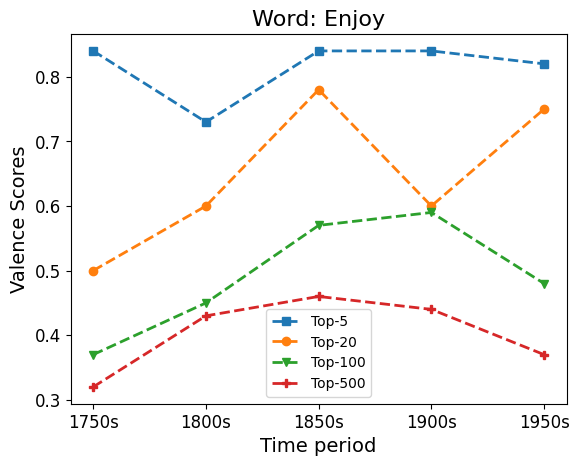

In [ ]:

x=[1,2,3,4,5]
custom_xticks = ['1750s', '1800s', '1850s', '1900s', '1950s']
plt.xticks(x, custom_xticks)
plt.plot(x,  [ 0.84 , 0.73 , 0.84 , 0.84 , 0.82], marker='s', label='Top-5',  linewidth=2, linestyle='dashed')
plt.plot(x, [0.5 , 0.6 , 0.78 , 0.6 , 0.75], marker='o', label='Top-20',  linewidth=2, linestyle='dashed')
plt.plot(x, [0.37, 0.45, 0.57, 0.59, 0.48], marker='v', label='Top-100',  linewidth=2, linestyle='dashed')
plt.plot(x, [0.32, 0.43, 0.46, 0.44, 0.37], marker='P', label='Top-500',  linewidth=2, linestyle='dashed')
plt.title('Word: Enjoy', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time period', fontsize=14)
plt.ylabel('Valence Scores', fontsize=14)
plt.legend()

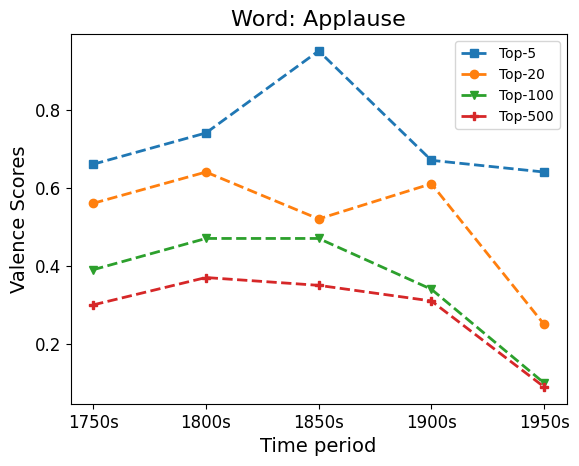

In [73]:
custom_xticks = ['1750s', '1800s', '1850s', '1900s', '1950s']
plt.xticks(x, custom_xticks)
plt.plot(x,  [ 0.66, 0.74, 0.95, 0.67, 0.64], marker='s', label='Top-5', linewidth=2, linestyle='dashed')
plt.plot(x, [0.56, 0.64, 0.52, 0.61, 0.25], marker='o', label='Top-20', linewidth=2, linestyle='dashed')
plt.plot(x, [0.39, 0.47, 0.47, 0.34, 0.1], marker='v', label='Top-100', linewidth=2, linestyle='dashed')
plt.plot(x, [0.3, 0.37, 0.35, 0.31, 0.09], marker='P', label='Top-500', linewidth=2, linestyle='dashed')
plt.title('Word: Applause', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time period', fontsize=14)
plt.ylabel('Valence Scores', fontsize=14)
plt.legend()

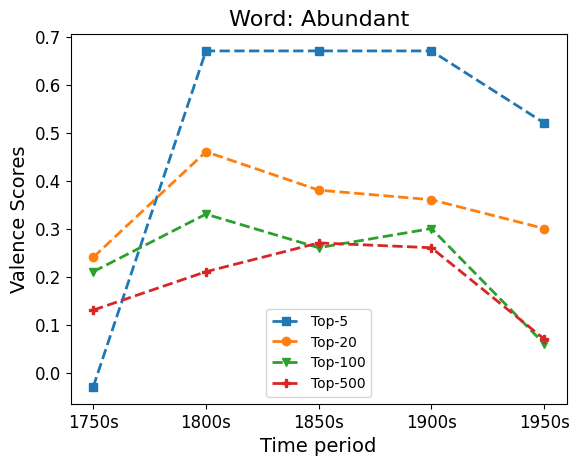

In [74]:
custom_xticks = ['1750s', '1800s', '1850s', '1900s', '1950s']
plt.xticks(x, custom_xticks)
plt.plot(x,  [-0.03, 0.67, 0.67, 0.67, 0.52], marker='s', label='Top-5', linewidth= 2,linestyle='dashed')
plt.plot(x, [0.24, 0.46, 0.38, 0.36, 0.3], marker='o', label='Top-20', linewidth= 2, linestyle='dashed')
plt.plot(x, [0.21, 0.33, 0.26, 0.3, 0.06], marker='v', label='Top-100', linewidth= 2, linestyle='dashed')
plt.plot(x, [0.13, 0.21, 0.27, 0.26, 0.07], marker='P', label='Top-500', linewidth= 2, linestyle='dashed')
plt.title('Word: Abundant', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time period', fontsize=14)
plt.ylabel('Valence Scores', fontsize=14)
plt.legend()

### No of sentences

In [8]:
count = 0
for i in tqdm(range(len(file['text']))):
    count += len(file['text'][i])
print("Total number of sentences:", count)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 249/249 [00:00<00:00, 945997.91it/s]

Total number of sentences: 91882123
